In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pylab as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from utils.embedding import lis, layers, data_prepare, embedding, get_lines
from utils.geometry import *
from shapely.geometry import LineString, Polygon, LinearRing

In [4]:
chip_1, chip_2, connections = data_prepare()

In [5]:
new_points, subsequences = layers(chip_1, chip_2, connections)

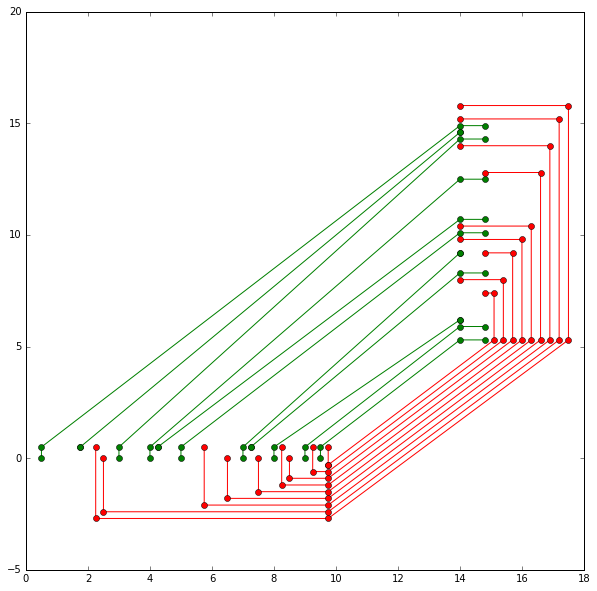

In [6]:
plt.figure(figsize=[10, 10])

for i in embedding(connections, subsequences[0], subsequences[1], chip_1, chip_2)[0]:
    plt.plot(i[0],i[1], 'o-', color='g')

for i in embedding(connections, subsequences[0], subsequences[1], chip_1, chip_2)[1]:
    plt.plot(i[0],i[1], 'o-', color='r')

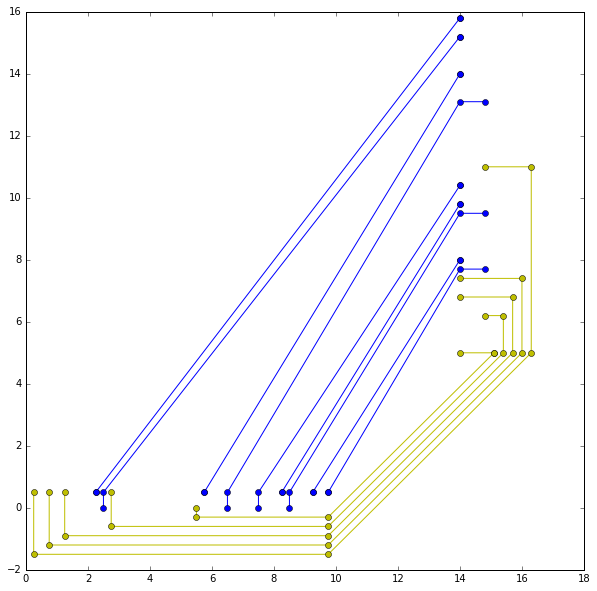

In [7]:
plt.figure(figsize=[10, 10])

for i in embedding(connections, subsequences[1], subsequences[2], chip_1, chip_2)[0]:
    plt.plot(i[0],i[1], 'o-', color='b')
    

for i in embedding(connections, subsequences[1], subsequences[2], chip_1, chip_2)[1]:
    plt.plot(i[0],i[1], 'o-', color='y')

In [11]:
lines1 = get_lines(connections, subsequences[0], subsequences[3], chip_1, chip_2, internal=0)

In [12]:
lines2 = get_lines(connections, subsequences[0], subsequences[3], chip_1, chip_2, internal=1)

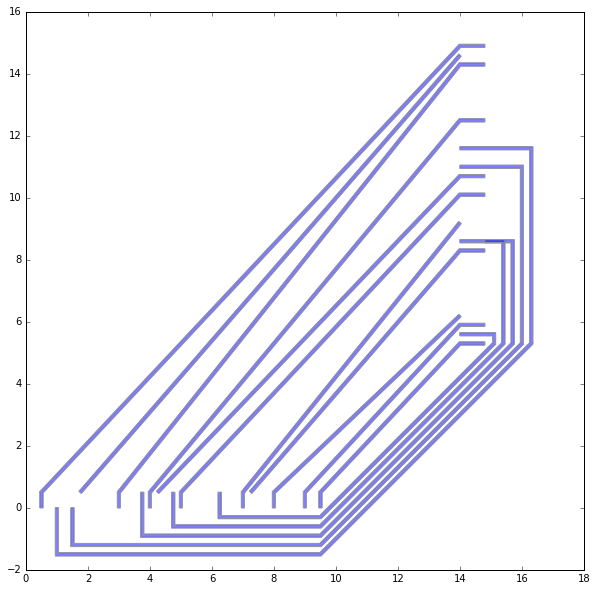

In [13]:
plot_all_lines(lines2)
plot_all_lines(lines1)

In [15]:
min_distance(lines2)

0.19205531989934393

In [16]:
min_distance(lines1)

0.0